In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

<function matplotlib.pyplot.show(*args, **kw)>

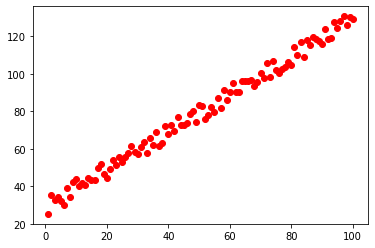

In [3]:
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints,2))
    y = np.zeros(shape=numPoints)
    
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (i+bias) + random.uniform(0,1) * variance
    return x,y

x,y = gen_data(100,25,10)

plt.plot(x[:,1]+1,y,'ro')
plt.show

In [4]:
df = pd.read_csv("C:/Users/qual9/slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
raw_X = df["X"].values.reshape(-1,1)
y = df["Y"].values
y

array([392.5,  46.2,  15.7, 422.2, 119.4, 170.9,  56.9,  77.5, 214. ,
        65.3,  20.9, 248.1,  23.5,  39.6,  48.8,   6.6, 134.9,  50.9,
         4.4, 113. ,  14.8,  48.7,  52.1,  13.2, 103.9,  77.5,  11.8,
        98.1,  27.9,  38.1,   0. ,  69.2,  14.6,  40.3, 161.5,  57.2,
       217.6,  58.1,  12.6,  59.6,  89.9, 202.4, 181.3, 152.8, 162.8,
        73.4,  21.3,  92.6,  76.1,  39.9, 142.1,  93. ,  31.9,  32.1,
        55.6, 133.3, 194.5, 137.9,  87.4, 209.8,  95.5, 244.6, 187.5])

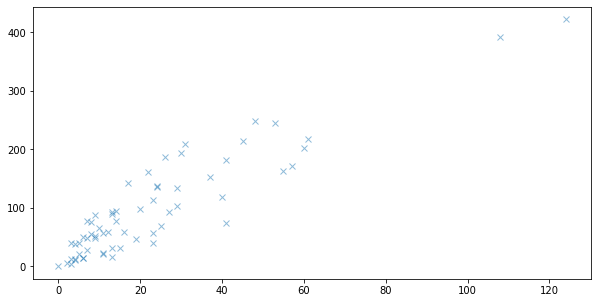

In [6]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y,'x',alpha=0.5)

In [7]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]], dtype=int64), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [8]:
np.ones((len(raw_X),1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
X = np.concatenate((np.ones((len(raw_X),1)),raw_X),axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [10]:
w = np.random.normal((2,1))
w

array([2.07844047, 1.52975533])

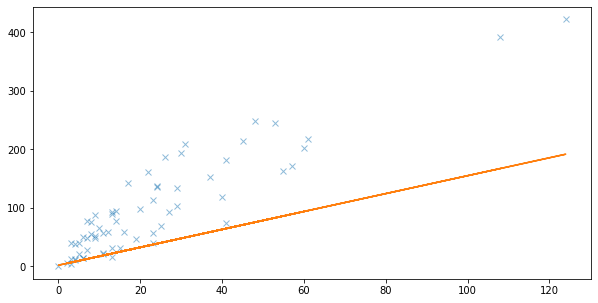

In [11]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X,w)
plt.plot(raw_X,y,"x",alpha=0.5)
plt.plot(raw_X,y_predict)

In [12]:
def hypothesis_function(X,theta):
    return X.dot(theta)

def cost_function(h,y):
    return (1/(2*len(y)))*np.sum((h-y)**2)

## Gradient Descent

In [13]:
def gradient_descent(X,y,w,alpha,iterations):
    theta = w
    m = len(y) #데이터의 갯수
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X,theta),y)
    cost_list = [cost]
    
    for i in range(iterations):
        t0 = theta[0] - (alpha/m) * np.sum(np.dot(X,theta)-y)
        t1 = theta[1] - (alpha/m) * np.sum((np.dot(X,theta)-y) * X[:,1])
        theta = np.array([t0,t1])
        
        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)
            
    return theta, theta_list, cost_list

In [14]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X,y,w,alpha,iterations)
cost = cost_function(hypothesis_function(X,theta),y)

print("theta:",theta)
print("cost:", cost)

theta: [19.88060908  3.41628243]
cost: 625.3742434133792


In [15]:
theta_list = np.array(theta_list)

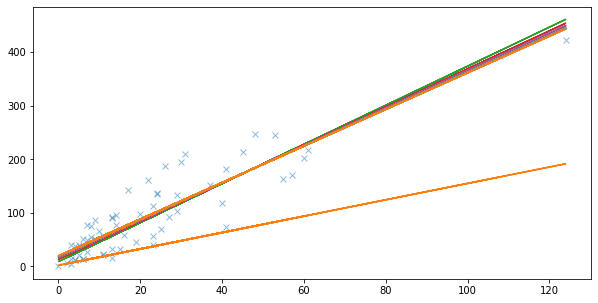

In [16]:
plt.figure(figsize=(10,5))

y_predict_step=np.dot(X,theta_list.transpose())

#y_predict_step
plt.plot(raw_X,y,"x",alpha=0.5)
for i in range(0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i])

plt.show()